In [2]:
data<- read.csv("PFC_22genes_AllBehav.csv", header=TRUE, row.names=1)

In [4]:
head(data)

,ARPP21,ATP6AP1L,B3GALT2,C9orf116,CALB1,CCDC80,CREB3L1,CTXN3,DACH1,GABRA3,...,SYNJ2,VSTM2L,OF_HPA1_T_AUC,OF_HPA1_Net_AUC,OF_HPA2_T_AUC,OF_HPA2_Net_AUC,OFA1_Total,OFA2_Total,Startle,Group
Beta1_F1,3430,1607,2086,30,497,260,482,2023,133,6661,...,2651,1275,1695,1338.00,2269,1993.0,2631,263,492.43,Beta
Beta2_F1,3193,1683,1751,32,489,136,386,1789,73,6050,...,3080,800,2901,1768.00,2336,1536.0,1417,43,712.38,Beta
Beta3_F1,4427,2056,1261,14,364,125,346,1289,119,4921,...,2570,1412,1436,588.80,2045,1868.0,344,956,360.00,Beta
Beta4_F1,3836,2555,1753,30,520,247,482,2737,129,5432,...,3420,803,2327,570.60,2821,1808.0,551,2203,148.38,Beta
Control1_F1,9818,1733,935,95,2647,120,381,1277,393,4692,...,2713,2490,1729,1334.00,2701,-12.3,444,780,141.50,Control
Control2_F1,3802,777,1052,41,572,89,285,963,121,3407,...,1719,1160,1590,65.25,2598,1192.0,292,1091,190.50,Control


In [20]:
colnames(data)

[1] "ARPP21"          "ATP6AP1L"        "B3GALT2"         "C9orf116"       
 [5] "CALB1"           "CCDC80"          "CREB3L1"         "CTXN3"          
 [9] "DACH1"           "GABRA3"          "GARNL3"          "GLRA3"          
[13] "GPR52"           "KRT80"           "NRIP3"           "PAPPA2"         
[17] "Pdyn"            "PLA2G2C"         "SOWAHA"          "SPON1"          
[21] "SYNJ2"           "VSTM2L"          "OF_HPA1_T_AUC"   "OF_HPA1_Net_AUC"
[25] "OF_HPA2_T_AUC"   "OF_HPA2_Net_AUC" "OFA1_Total"      "OFA2_Total"     
[29] "Startle"         "Group"

In [8]:
ncol(data)

[1] 30

In [36]:
datah<-(t(data[,1:29]))
head(datah)

,Beta1_F1,Beta2_F1,Beta3_F1,Beta4_F1,Control1_F1,Control2_F1,Control3_F1,Control4_F1,Beta1_F2,Beta2_F2,...,Control3_F2,Control4_F2,Beta1_F3,Beta2_F3,Beta3_F3,Beta4_F3,Control1_F3,Control2_F3,Control3_F3,Control4_F3
ARPP21,3430,3193,4427,3836,9818,3802,5880,8455,3505,3005,...,3737,4255,3714,4842,2968,3752,4125,8464,8318,6903
ATP6AP1L,1607,1683,2056,2555,1733,777,764,944,2110,1667,...,2169,1991,2077,1961,2090,1422,1398,1265,1532,1050
B3GALT2,2086,1751,1261,1753,935,1052,848,783,2129,1099,...,1004,933,1706,2071,1788,1718,1408,773,1293,778
C9orf116,30,32,14,30,95,41,54,86,26,37,...,54,49,48,31,26,25,71,67,43,83
CALB1,497,489,364,520,2647,572,1008,1868,272,399,...,634,653,322,485,321,280,432,1503,1429,879
CCDC80,260,136,125,247,120,89,70,82,259,81,...,57,64,160,219,164,149,167,77,100,90


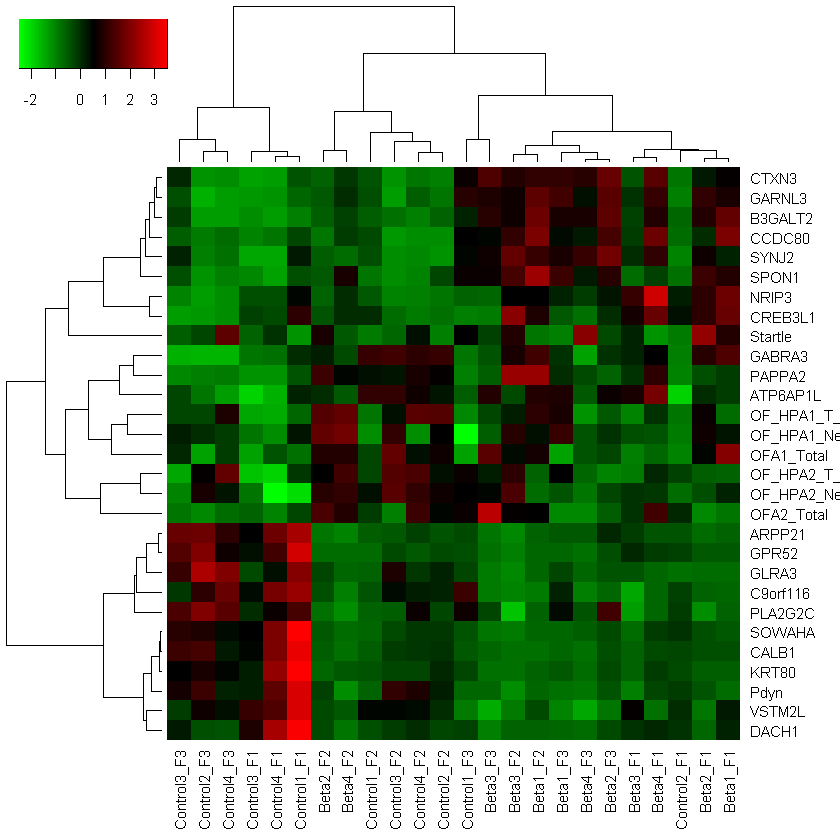

In [39]:
library(heatmap3)
library(ggplot2)
library(gplots)
heatmap3(datah, Rowv = NULL, Colv = NULL,
  distfun = function(x) as.dist(1 - cor(t(x), use = "pa")),
  balanceColor = F,showColDendro = T,
  showRowDendro = T, col = greenred(105), legendfun, method = "complete", ColAxisColors = 0,
  RowAxisColors = 7, hclustfun = hclust, reorderfun = function(d, w)
  reorder(d, w), add.expr, symm = FALSE,
  scale = "row", na.rm = TRUE, 
  ColSideWidth = 0.4, 
  file = "heatmap3.pdf", topN = NA, filterFun = sd, margins = c(5, 5), lasRow = 2, lasCol = 2,
  labRow =colnames(data), labCol = NULL , main = NULL, xlab = NULL, ylab = NULL,
  keep.dendro = FALSE, verbose = getOption("verbose"))
      
### What we see from this heatmap is that F1 and F3 controls cluster together, and F1 and F3 Betas cluster together 
### on either side of the heatmap, while F2 treatment groups cluster in the middle. Is it possible that molecular 
### mehcanism diriving behavior in F1 and F3 is more similar that what is occuring in F2?
      
## OR Are Beta2_F2, Beta4_F2, and Control2_F1 outliers that are throwing off the whole model?

In [47]:
F1 = data[1:8,]
F1

,ARPP21,ATP6AP1L,B3GALT2,C9orf116,CALB1,CCDC80,CREB3L1,CTXN3,DACH1,GABRA3,...,SYNJ2,VSTM2L,OF_HPA1_T_AUC,OF_HPA1_Net_AUC,OF_HPA2_T_AUC,OF_HPA2_Net_AUC,OFA1_Total,OFA2_Total,Startle,Group
Beta1_F1,3430,1607,2086,30,497,260,482,2023,133,6661,...,2651,1275,1695,1338.00,2269,1993.0,2631,263,492.43,Beta
Beta2_F1,3193,1683,1751,32,489,136,386,1789,73,6050,...,3080,800,2901,1768.00,2336,1536.0,1417,43,712.38,Beta
Beta3_F1,4427,2056,1261,14,364,125,346,1289,119,4921,...,2570,1412,1436,588.80,2045,1868.0,344,956,360.00,Beta
Beta4_F1,3836,2555,1753,30,520,247,482,2737,129,5432,...,3420,803,2327,570.60,2821,1808.0,551,2203,148.38,Beta
Control1_F1,9818,1733,935,95,2647,120,381,1277,393,4692,...,2713,2490,1729,1334.00,2701,-12.3,444,780,141.50,Control
Control2_F1,3802,777,1052,41,572,89,285,963,121,3407,...,1719,1160,1590,65.25,2598,1192.0,292,1091,190.50,Control
Control3_F1,5880,764,848,54,1008,70,209,610,190,3529,...,1419,1677,1062,124.80,1345,1092.0,39,462,242.75,Control
Control4_F1,8455,944,783,86,1868,82,195,625,317,3614,...,1431,1801,1037,-154.20,1194,-371.1,695,67,330.25,Control


In [48]:
F3 = data[17:24,]
F3

,ARPP21,ATP6AP1L,B3GALT2,C9orf116,CALB1,CCDC80,CREB3L1,CTXN3,DACH1,GABRA3,...,SYNJ2,VSTM2L,OF_HPA1_T_AUC,OF_HPA1_Net_AUC,OF_HPA2_T_AUC,OF_HPA2_Net_AUC,OFA1_Total,OFA2_Total,Startle,Group
Beta1_F3,3714,2077,1706,48,322,160,169,2408,74,4620,...,3207,722,3073,2234.00,3202.0,1462.0,14.0,46.0,182.50,Beta
Beta2_F3,4842,1961,2071,31,485,219,241,2877,98,4630,...,4017,782,1872,988.25,1982.5,1612.0,839.5,511.5,287.13,Beta
Beta3_F3,2968,2090,1788,26,321,164,109,2645,50,4083,...,3097,521,2108,410.70,2955.0,2347.0,2222.0,3507.0,305.00,Beta
Beta4_F3,3752,1422,1718,25,280,149,129,2340,67,2857,...,3463,546,1288,540.20,2257.0,1099.0,718.0,28.0,686.38,Beta
Control1_F3,4125,1398,1408,71,432,167,103,2060,106,3541,...,2892,774,1408,-1564.00,3293.0,2357.0,34.0,1638.0,422.38,Control
Control2_F3,8464,1265,773,67,1503,77,62,720,94,2522,...,1796,1475,2079,1018.00,3254.0,2652.0,39.0,33.0,294.75,Control
Control3_F3,8318,1532,1293,43,1429,100,57,1661,144,2600,...,2646,1090,2087,1185.00,1614.0,932.3,1086.0,242.0,247.75,Control
Control4_F3,6903,1050,778,83,879,90,81,743,92,2499,...,1916,1310,3124,826.20,4154.0,2156.0,915.0,319.0,603.00,Control


In [63]:
F1F3<- rbind(F1,F3)
F1F3

,ARPP21,ATP6AP1L,B3GALT2,C9orf116,CALB1,CCDC80,CREB3L1,CTXN3,DACH1,GABRA3,...,SYNJ2,VSTM2L,OF_HPA1_T_AUC,OF_HPA1_Net_AUC,OF_HPA2_T_AUC,OF_HPA2_Net_AUC,OFA1_Total,OFA2_Total,Startle,Group
Beta1_F1,3430,1607,2086,30,497,260,482,2023,133,6661,...,2651,1275,1695,1338.00,2269.0,1993.0,2631.0,263.0,492.43,Beta
Beta2_F1,3193,1683,1751,32,489,136,386,1789,73,6050,...,3080,800,2901,1768.00,2336.0,1536.0,1417.0,43.0,712.38,Beta
Beta3_F1,4427,2056,1261,14,364,125,346,1289,119,4921,...,2570,1412,1436,588.80,2045.0,1868.0,344.0,956.0,360.00,Beta
Beta4_F1,3836,2555,1753,30,520,247,482,2737,129,5432,...,3420,803,2327,570.60,2821.0,1808.0,551.0,2203.0,148.38,Beta
Control1_F1,9818,1733,935,95,2647,120,381,1277,393,4692,...,2713,2490,1729,1334.00,2701.0,-12.3,444.0,780.0,141.50,Control
Control2_F1,3802,777,1052,41,572,89,285,963,121,3407,...,1719,1160,1590,65.25,2598.0,1192.0,292.0,1091.0,190.50,Control
Control3_F1,5880,764,848,54,1008,70,209,610,190,3529,...,1419,1677,1062,124.80,1345.0,1092.0,39.0,462.0,242.75,Control
Control4_F1,8455,944,783,86,1868,82,195,625,317,3614,...,1431,1801,1037,-154.20,1194.0,-371.1,695.0,67.0,330.25,Control
Beta1_F3,3714,2077,1706,48,322,160,169,2408,74,4620,...,3207,722,3073,2234.00,3202.0,1462.0,14.0,46.0,182.50,Beta
Beta2_F3,4842,1961,2071,31,485,219,241,2877,98,4630,...,4017,782,1872,988.25,1982.5,1612.0,839.5,511.5,287.13,Beta


In [64]:
nrow(F1F3)

[1] 16

In [73]:
F1F3h<-(t(F1F3[,1:29]))
head(F1F3h)

,Beta1_F1,Beta2_F1,Beta3_F1,Beta4_F1,Control1_F1,Control2_F1,Control3_F1,Control4_F1,Beta1_F3,Beta2_F3,Beta3_F3,Beta4_F3,Control1_F3,Control2_F3,Control3_F3,Control4_F3
ARPP21,3430,3193,4427,3836,9818,3802,5880,8455,3714,4842,2968,3752,4125,8464,8318,6903
ATP6AP1L,1607,1683,2056,2555,1733,777,764,944,2077,1961,2090,1422,1398,1265,1532,1050
B3GALT2,2086,1751,1261,1753,935,1052,848,783,1706,2071,1788,1718,1408,773,1293,778
C9orf116,30,32,14,30,95,41,54,86,48,31,26,25,71,67,43,83
CALB1,497,489,364,520,2647,572,1008,1868,322,485,321,280,432,1503,1429,879
CCDC80,260,136,125,247,120,89,70,82,160,219,164,149,167,77,100,90


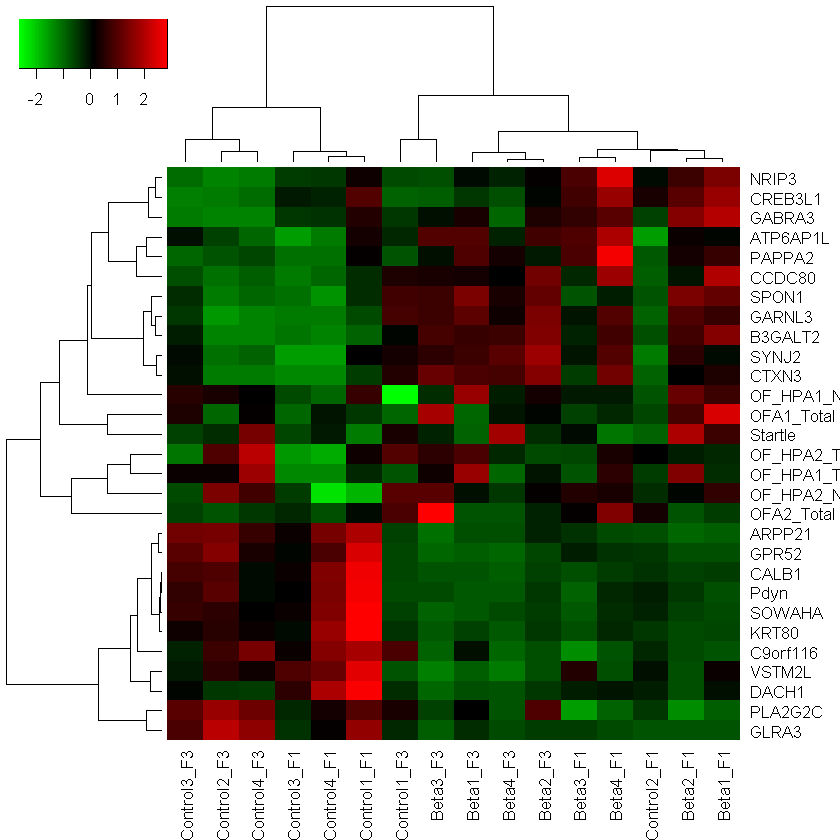

In [74]:
heatmap3(F1F3h, Rowv = NULL, Colv = NULL,
  distfun = function(x) as.dist(1 - cor(t(x), use = "pa")),
  balanceColor = F,showColDendro = T,
  showRowDendro = T, col = greenred(105), legendfun, method = "complete", ColAxisColors = 0,
  RowAxisColors = 7, hclustfun = hclust, reorderfun = function(d, w)
  reorder(d, w), add.expr, symm = FALSE,
  scale = "row", na.rm = TRUE, 
  ColSideWidth = 0.4, 
  file = "heatmap3.pdf", topN = NA, filterFun = sd, margins = c(5, 5), lasRow = 2, lasCol = 2,
  labRow =colnames(data), labCol = NULL , main = NULL, xlab = NULL, ylab = NULL,
  keep.dendro = FALSE, verbose = getOption("verbose"))
      
### Control2_F1 may be an outlier.

In [102]:
F1F3h<- as.data.frame(F1F3h)
F1F3hr<- within(F1F3h, rm(Control2_F1))
F1F3t<- as.data.frame(t(F1F3hr))
F1F3t

,ARPP21,ATP6AP1L,B3GALT2,C9orf116,CALB1,CCDC80,CREB3L1,CTXN3,DACH1,GABRA3,...,SPON1,SYNJ2,VSTM2L,OF_HPA1_T_AUC,OF_HPA1_Net_AUC,OF_HPA2_T_AUC,OF_HPA2_Net_AUC,OFA1_Total,OFA2_Total,Startle
Beta1_F1,3430,1607,2086,30,497,260,482,2023,133,6661,...,5017,2651,1275,1695,1338.00,2269.0,1993.0,2631.0,263.0,492.43
Beta2_F1,3193,1683,1751,32,489,136,386,1789,73,6050,...,5320,3080,800,2901,1768.00,2336.0,1536.0,1417.0,43.0,712.38
Beta3_F1,4427,2056,1261,14,364,125,346,1289,119,4921,...,3018,2570,1412,1436,588.80,2045.0,1868.0,344.0,956.0,360.00
Beta4_F1,3836,2555,1753,30,520,247,482,2737,129,5432,...,3635,3420,803,2327,570.60,2821.0,1808.0,551.0,2203.0,148.38
Control1_F1,9818,1733,935,95,2647,120,381,1277,393,4692,...,3440,2713,2490,1729,1334.00,2701.0,-12.3,444.0,780.0,141.50
Control3_F1,5880,764,848,54,1008,70,209,610,190,3529,...,2659,1419,1677,1062,124.80,1345.0,1092.0,39.0,462.0,242.75
Control4_F1,8455,944,783,86,1868,82,195,625,317,3614,...,2326,1431,1801,1037,-154.20,1194.0,-371.1,695.0,67.0,330.25
Beta1_F3,3714,2077,1706,48,322,160,169,2408,74,4620,...,5300,3207,722,3073,2234.00,3202.0,1462.0,14.0,46.0,182.50
Beta2_F3,4842,1961,2071,31,485,219,241,2877,98,4630,...,5048,4017,782,1872,988.25,1982.5,1612.0,839.5,511.5,287.13
Beta3_F3,2968,2090,1788,26,321,164,109,2645,50,4083,...,4624,3097,521,2108,410.70,2955.0,2347.0,2222.0,3507.0,305.00


In [87]:
colnames(F1F3hr)

[1] "Beta1_F1"    "Beta2_F1"    "Beta3_F1"    "Beta4_F1"    "Control1_F1"
 [6] "Control3_F1" "Control4_F1" "Beta1_F3"    "Beta2_F3"    "Beta3_F3"   
[11] "Beta4_F3"    "Control1_F3" "Control2_F3" "Control3_F3" "Control4_F3"

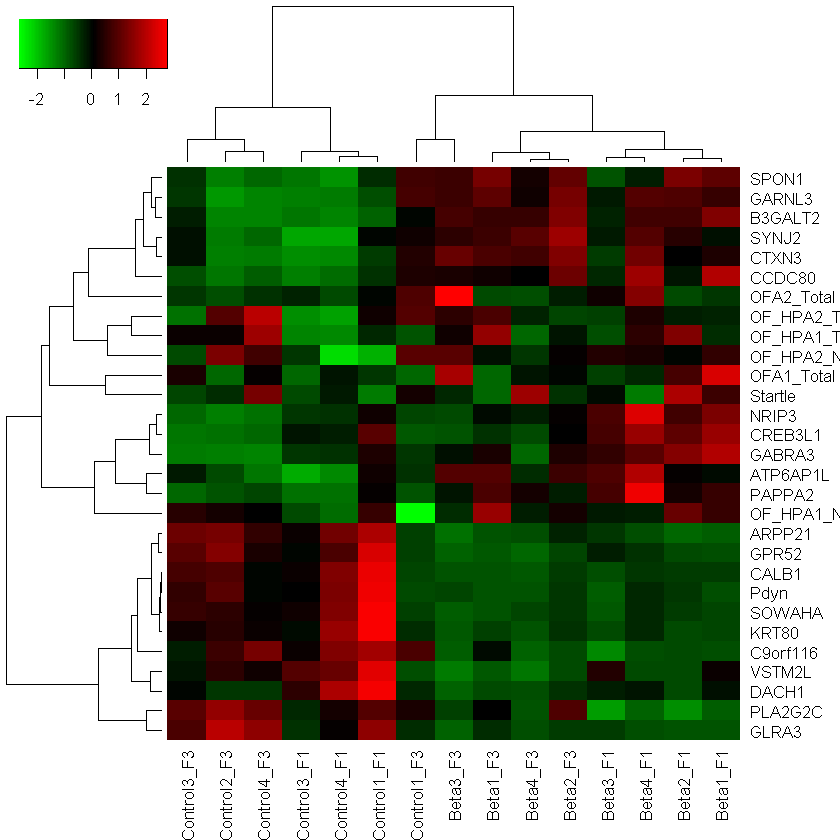

In [88]:
heatmap3(F1F3hr, Rowv = NULL, Colv = NULL,
  distfun = function(x) as.dist(1 - cor(t(x), use = "pa")),
  balanceColor = F,showColDendro = T,
  showRowDendro = T, col = greenred(105), legendfun, method = "complete", ColAxisColors = 0,
  RowAxisColors = 7, hclustfun = hclust, reorderfun = function(d, w)
  reorder(d, w), add.expr, symm = FALSE,
  scale = "row", na.rm = TRUE, 
  ColSideWidth = 0.4, 
  file = "heatmap3.pdf", topN = NA, filterFun = sd, margins = c(5, 5), lasRow = 2, lasCol = 2,
  labRow =colnames(data), labCol = NULL , main = NULL, xlab = NULL, ylab = NULL,
  keep.dendro = FALSE, verbose = getOption("verbose"))

In [368]:
model = lm(OFA1_Total ~ SYNJ2+B3GALT2+GARNL3+Pdyn, data=F1F3t)
summary(model)
### Here we see that a model can be made that fits across F1 and F3 when Control2_F1 is removed as an outlier


Call:
lm(formula = OFA1_Total ~ SYNJ2 + B3GALT2 + GARNL3 + GPR52, data = F1F3t)

Residuals:
    Min      1Q  Median      3Q     Max 
-598.48 -293.18    1.86  199.75 1033.66 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -42.9025  1082.4737  -0.040  0.96917   
SYNJ2         -0.7120     0.4904  -1.452  0.17721   
B3GALT2        3.4595     0.9331   3.708  0.00406 **
GARNL3        -1.6454     1.3027  -1.263  0.23520   
GPR52          3.3023     3.9109   0.844  0.41820   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 566.5 on 10 degrees of freedom
Multiple R-squared:  0.6281,	Adjusted R-squared:  0.4794 
F-statistic: 4.223 on 4 and 10 DF,  p-value: 0.02945


In [227]:
input <- F1F3t[,c("SYNJ2","B3GALT2","GARNL3","Pdyn","OFA1_Total")]
head(input)

,SYNJ2,B3GALT2,GARNL3,Pdyn,OFA1_Total
Beta1_F1,2651,2086,1683,254,2631
Beta2_F1,3080,1751,1792,362,1417
Beta3_F1,2570,1261,1366,168,344
Beta4_F1,3420,1753,1813,437,551
Control1_F1,2713,935,1140,1733,444
Control3_F1,1419,848,928,615,39


In [246]:
input['Predicted'] = fitted.values(model)

input    

,SYNJ2,B3GALT2,GARNL3,Pdyn,OFA1_Total,Predicted
Beta1_F1,2651,2086,1683,254,2631.0,2612.76330
Beta2_F1,3080,1751,1792,362,1417.0,1020.33594
Beta3_F1,2570,1261,1366,168,344.0,312.22225
Beta4_F1,3420,1753,1813,437,551.0,794.50786
Control1_F1,2713,935,1140,1733,444.0,279.62534
Control3_F1,1419,848,928,615,39.0,664.67128
Control4_F1,1431,783,944,1178,695.0,692.66622
Beta1_F3,3207,1706,1856,223,14.0,593.85331
Beta2_F3,4017,2071,1968,365,839.5,1179.34507
Beta3_F3,3097,1788,1709,278,2222.0,1237.85401


In [306]:
loo <-input[-15,]

model_cv = lm(OFA1_Total ~ SYNJ2+B3GALT2+GARNL3+Pdyn, data=loo)


In [307]:
a <- coef(model_cv)[1]
print(a)

XSYNJ2 <- coef(model_cv)[2]
XB3GALT2 <- coef(model_cv)[3]
XGARNL3<-coef(model_cv)[4]
XPdyn<-coef(model_cv)[5]

(Intercept) 
  -984.7239 


In [262]:
Beta1_F1p= a+XSYNJ2*2651+XB3GALT2*2086+XGARNL3*1683+XPdyn*254

In [266]:
Beta2_F1p= a+XSYNJ2*3080+XB3GALT2*1751+XGARNL3*1792+XPdyn*362

In [269]:
Beta3_F1p= a+XSYNJ2*2570+XB3GALT2*1261+XGARNL3*1366+XPdyn*168

In [272]:
Beta4_F1p= a+XSYNJ2*3420+XB3GALT2*1753+XGARNL3*1813+XPdyn*437

In [275]:
Control1_F1p= a+XSYNJ2*2713+XB3GALT2*935+XGARNL3*1140+XPdyn*1733

In [281]:
Control3_F1p= a+XSYNJ2*1419+XB3GALT2*848+XGARNL3*928+XPdyn*615

In [284]:
Control4_F1p= a+XSYNJ2*1431+XB3GALT2*783+XGARNL3*944+XPdyn*1178

In [287]:
Beta1_F3p = a+XSYNJ2*3207+XB3GALT2*1706+XGARNL3*1856+XPdyn*223


In [290]:
Beta2_F3p = a+XSYNJ2*4017+XB3GALT2*2071+XGARNL3*1968+XPdyn*365

In [293]:
Beta3_F3p = a+XSYNJ2*3097+XB3GALT2*1788+XGARNL3*1709+XPdyn*278

In [296]:
 Beta4_F3p = a+XSYNJ2*3463+XB3GALT2*1718+XGARNL3*1525+XPdyn*215


In [299]:
Control1_F3p = a+XSYNJ2*2892+XB3GALT2*1408+XGARNL3*1752+XPdyn*276

In [302]:
Control2_F3p = a+XSYNJ2*1796+XB3GALT2*773+XGARNL3*819+XPdyn*1016

In [305]:
Control3_F3p = a+XSYNJ2*2646+XB3GALT2*1293+XGARNL3*1236+XPdyn*844

In [308]:
Control4_F3p = a+XSYNJ2*1916+XB3GALT2*778+XGARNL3*904+XPdyn*581

In [309]:
Predicted_CV = c(Beta1_F1p,Beta2_F1p,Beta3_F1p,Beta4_F1p,Control1_F1p,Control3_F1p,Control4_F1p,Beta1_F3p,Beta2_F3p,Beta3_F3p,Beta4_F3p,Control1_F3p,Control2_F3p,Control3_F3p,Control4_F3p)

In [337]:
input['Predicted_CV']= Predicted_CV
Group = c('Beta','Beta','Beta','Beta','Control','Control','Control','Beta','Beta','Beta','Beta','Control','Control','Control','Control')
input['Group']= Group
input

,SYNJ2,B3GALT2,GARNL3,Pdyn,OFA1_Total,Predicted,Predicted_,Predicted_CV,Group
Beta1_F1,2651,2086,1683,254,2631.0,2612.76330,2564.8243,2564.8243,Beta
Beta2_F1,3080,1751,1792,362,1417.0,1020.33594,943.3668,943.3668,Beta
Beta3_F1,2570,1261,1366,168,344.0,312.22225,301.5498,301.5498,Beta
Beta4_F1,3420,1753,1813,437,551.0,794.50786,839.0248,839.0248,Beta
Control1_F1,2713,935,1140,1733,444.0,279.62534,-115.7818,-115.7818,Control
Control3_F1,1419,848,928,615,39.0,664.67128,942.7189,942.7189,Control
Control4_F1,1431,783,944,1178,695.0,692.66622,691.1863,691.1863,Control
Beta1_F3,3207,1706,1856,223,14.0,593.85331,765.1185,765.1185,Beta
Beta2_F3,4017,2071,1968,365,839.5,1179.34507,1331.1558,1331.1558,Beta
Beta3_F3,3097,1788,1709,278,2222.0,1237.85401,1102.5064,1102.5064,Beta


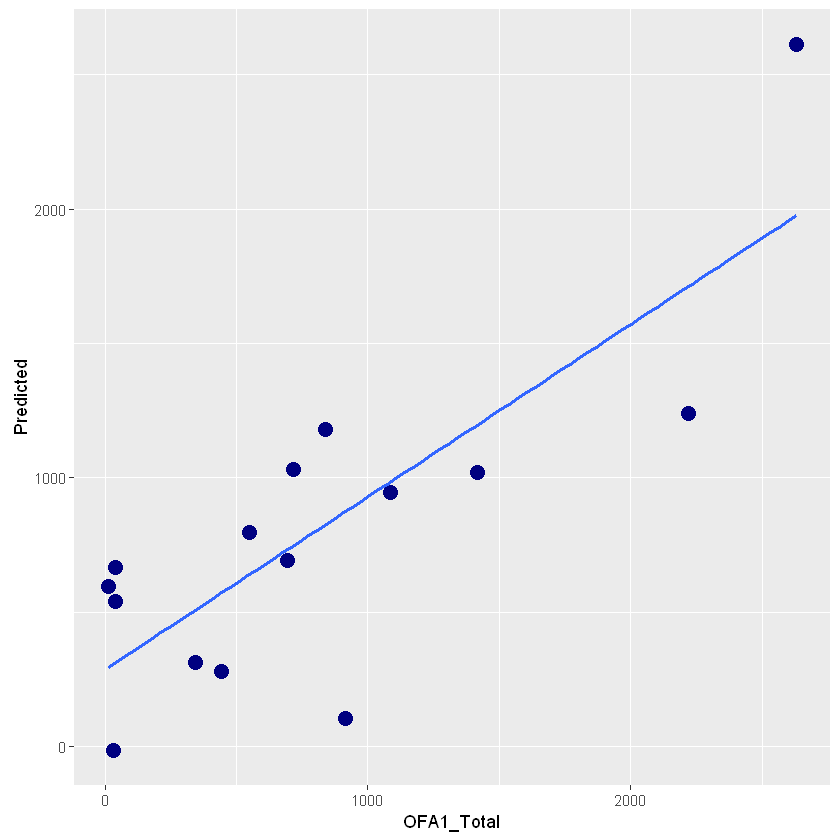

In [343]:
p <- ggplot(input,aes(OFA1_Total,Predicted))
p + geom_point(size = 4, color= 'navy') +
    geom_smooth(method='lm', se = FALSE)

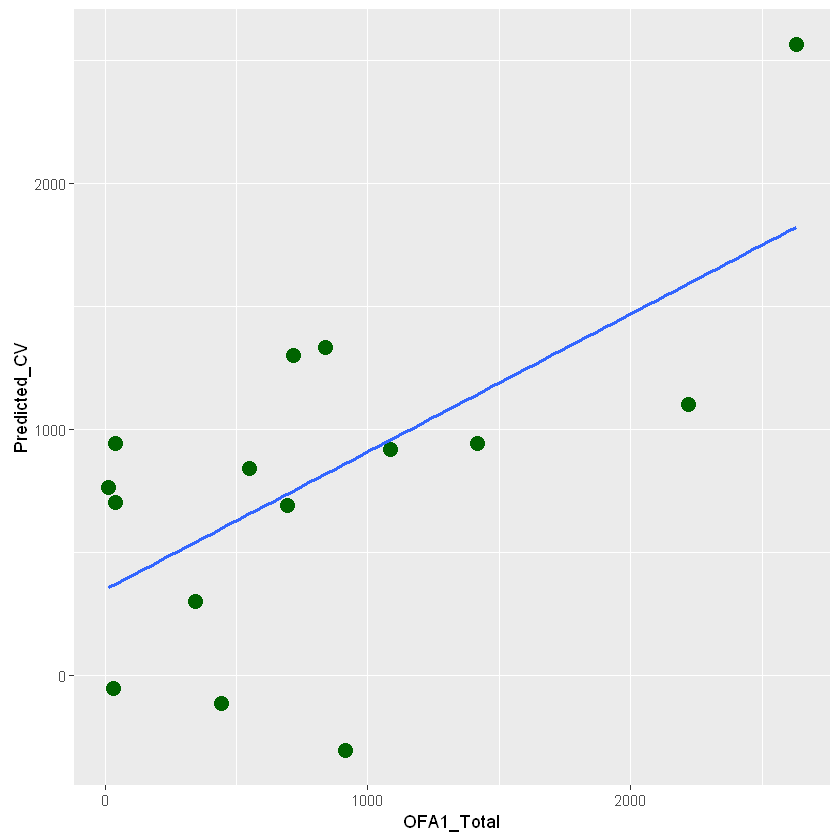

In [342]:
p <- ggplot(input,aes(OFA1_Total,Predicted_CV))
p + geom_point(size = 4, color = 'darkgreen') +
    geom_smooth(method='lm', se = FALSE)

In [330]:
test = lm(Predicted_CV~OFA1_Total, data=input)
summary(test)


Call:
lm(formula = Predicted_CV ~ OFA1_Total, data = input)

Residuals:
     Min       1Q   Median       3Q      Max 
-1165.79  -329.00   -38.05   461.99   742.72 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 346.8624   211.7118   1.638    0.125  
OFA1_Total    0.5607     0.1921   2.918    0.012 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 564.4 on 13 degrees of freedom
Multiple R-squared:  0.3958,	Adjusted R-squared:  0.3493 
F-statistic: 8.516 on 1 and 13 DF,  p-value: 0.01198


In [352]:
cor.test(~Predicted+ OFA1_Total, data=input)


	Pearson's product-moment correlation

data:  Predicted and OFA1_Total
t = 4.8317, df = 13, p-value = 0.0003277
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4905999 0.9313446
sample estimates:
      cor 
0.8014463 


In [350]:
cor.test(~Predicted_CV+ OFA1_Total, data=input)


	Pearson's product-moment correlation

data:  Predicted_CV and OFA1_Total
t = 2.9182, df = 13, p-value = 0.01198
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1724302 0.8631976
sample estimates:
      cor 
0.6291229 



	Pearson's product-moment correlation

data:  Predicted and OFA1_Total
t = 4.8317, df = 13, p-value = 0.0003277
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4905999 0.9313446
sample estimates:
      cor 
0.8014463 


In [250]:
input2 = 

,SYNJ2,B3GALT2,GARNL3,Pdyn,OFA1_Total,Predicted
Beta1_F1,2651,2086,1683,254,2631.0,2612.76330
Beta2_F1,3080,1751,1792,362,1417.0,1020.33594
Beta3_F1,2570,1261,1366,168,344.0,312.22225
Beta4_F1,3420,1753,1813,437,551.0,794.50786
Control1_F1,2713,935,1140,1733,444.0,279.62534
Control3_F1,1419,848,928,615,39.0,664.67128
Control4_F1,1431,783,944,1178,695.0,692.66622
Beta1_F3,3207,1706,1856,223,14.0,593.85331
Beta2_F3,4017,2071,1968,365,839.5,1179.34507
Beta3_F3,3097,1788,1709,278,2222.0,1237.85401


In [226]:
model3 = lm(OFA1_Total ~ CCDC80+PAPPA2+GLRA3+PLA2G2C, data= F1F3t)
summary(model3)


Call:
lm(formula = OFA1_Total ~ CCDC80 + PAPPA2 + GLRA3 + PLA2G2C, 
    data = F1F3t)

Residuals:
     Min       1Q   Median       3Q      Max 
-1193.91  -209.16   -82.31   219.18  1160.64 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 1818.015   1002.352   1.814   0.0998 .
CCDC80        17.242      5.652   3.051   0.0122 *
PAPPA2       -21.841      8.304  -2.630   0.0252 *
GLRA3         22.187     11.589   1.914   0.0846 .
PLA2G2C      -13.835      5.775  -2.396   0.0376 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 626.6 on 10 degrees of freedom
Multiple R-squared:  0.545,	Adjusted R-squared:  0.363 
F-statistic: 2.994 on 4 and 10 DF,  p-value: 0.07266


In [ ]:
### Now to test the second hypothesis, that a model can be fit across all 3 generations if outliers are removed

In [182]:
head(data)
nrow(data)

,ARPP21,ATP6AP1L,B3GALT2,C9orf116,CALB1,CCDC80,CREB3L1,CTXN3,DACH1,GABRA3,...,SYNJ2,VSTM2L,OF_HPA1_T_AUC,OF_HPA1_Net_AUC,OF_HPA2_T_AUC,OF_HPA2_Net_AUC,OFA1_Total,OFA2_Total,Startle,Group
Beta1_F1,3430,1607,2086,30,497,260,482,2023,133,6661,...,2651,1275,1695,1338.00,2269,1993.0,2631,263,492.43,Beta
Beta2_F1,3193,1683,1751,32,489,136,386,1789,73,6050,...,3080,800,2901,1768.00,2336,1536.0,1417,43,712.38,Beta
Beta3_F1,4427,2056,1261,14,364,125,346,1289,119,4921,...,2570,1412,1436,588.80,2045,1868.0,344,956,360.00,Beta
Beta4_F1,3836,2555,1753,30,520,247,482,2737,129,5432,...,3420,803,2327,570.60,2821,1808.0,551,2203,148.38,Beta
Control1_F1,9818,1733,935,95,2647,120,381,1277,393,4692,...,2713,2490,1729,1334.00,2701,-12.3,444,780,141.50,Control
Control2_F1,3802,777,1052,41,572,89,285,963,121,3407,...,1719,1160,1590,65.25,2598,1192.0,292,1091,190.50,Control


[1] 24

In [198]:
datah<-as.data.frame(datah)
data_orm <- within(datah, rm(Beta2_F2,Beta4_F2,Control2_F1))
head(data_orm)

data_ormt<- as.data.frame(t(data_orm))




,Beta1_F1,Beta2_F1,Beta3_F1,Beta4_F1,Control1_F1,Control3_F1,Control4_F1,Beta1_F2,Beta3_F2,Control1_F2,...,Control3_F2,Control4_F2,Beta1_F3,Beta2_F3,Beta3_F3,Beta4_F3,Control1_F3,Control2_F3,Control3_F3,Control4_F3
ARPP21,3430,3193,4427,3836,9818,5880,8455,3505,2481,3632,...,3737,4255,3714,4842,2968,3752,4125,8464,8318,6903
ATP6AP1L,1607,1683,2056,2555,1733,764,944,2110,1515,2185,...,2169,1991,2077,1961,2090,1422,1398,1265,1532,1050
B3GALT2,2086,1751,1261,1753,935,848,783,2129,1662,1105,...,1004,933,1706,2071,1788,1718,1408,773,1293,778
C9orf116,30,32,14,30,95,54,86,26,23,35,...,54,49,48,31,26,25,71,67,43,83
CALB1,497,489,364,520,2647,1008,1868,272,258,390,...,634,653,322,485,321,280,432,1503,1429,879
CCDC80,260,136,125,247,120,70,82,259,203,113,...,57,64,160,219,164,149,167,77,100,90


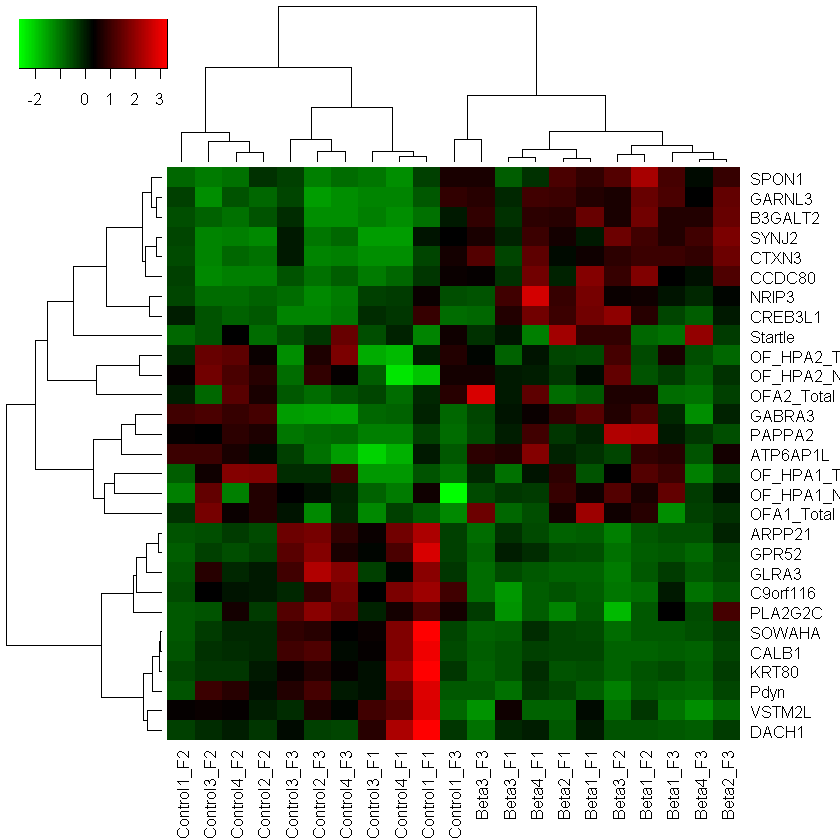

In [206]:
heatmap3(data_orm, Rowv = NULL, Colv = NULL,
  distfun = function(x) as.dist(1 - cor(t(x), use = "pa")),
  balanceColor = F,showColDendro = T,
  showRowDendro = T, col = greenred(105), legendfun, method = "complete", ColAxisColors = 0,
  RowAxisColors = 7, hclustfun = hclust, reorderfun = function(d, w)
  reorder(d, w), add.expr, symm = FALSE,
  scale = "row", na.rm = TRUE, 
  ColSideWidth = 0.4, 
  file = "heatmap3.pdf", topN = NA, filterFun = sd, margins = c(5, 5), lasRow = 2, lasCol = 2,
  labRow =row.names(data_orm), labCol = NULL , main = NULL, xlab = NULL, ylab = NULL,
  keep.dendro = FALSE, verbose = getOption("verbose"))

In [366]:
model2 = lm(OFA1_Total ~ SYNJ2+B3GALT2+GARNL3+Pdyn, data= data_ormt)
summary(model2)
### The model that fit F1 and F3 holds when F2 is added, even with 'outliers' removed,
### suggesting that these are the genes that are playing a strong role in influencing
### the Open Field Activity Across 3 generations 


Call:
lm(formula = OFA1_Total ~ SYNJ2 + B3GALT2 + GARNL3 + Pdyn, data = data_ormt)

Residuals:
    Min      1Q  Median      3Q     Max 
-949.97 -309.16  -45.02  335.71  859.80 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 838.4180   815.9639   1.028 0.319461    
SYNJ2        -0.5940     0.3472  -1.711 0.106392    
B3GALT2       3.4397     0.8427   4.082 0.000869 ***
GARNL3       -2.2623     1.1085  -2.041 0.058106 .  
Pdyn          0.2862     0.4378   0.654 0.522534    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 589 on 16 degrees of freedom
Multiple R-squared:  0.5358,	Adjusted R-squared:  0.4197 
F-statistic: 4.617 on 4 and 16 DF,  p-value: 0.0114


In [353]:
F2 = data[9:16,]
F2

,ARPP21,ATP6AP1L,B3GALT2,C9orf116,CALB1,CCDC80,CREB3L1,CTXN3,DACH1,GABRA3,...,SYNJ2,VSTM2L,OF_HPA1_T_AUC,OF_HPA1_Net_AUC,OF_HPA2_T_AUC,OF_HPA2_Net_AUC,OFA1_Total,OFA2_Total,Startle,Group
Beta1_F2,3505,2110,2129,26,272,259,357,2425,78,6454,...,3471,1025,3270,1406.0,2273,1206,1621,1533,200.63,Beta
Beta2_F2,3005,1667,1099,37,399,81,175,1139,97,4949,...,2084,1025,3691,2769.0,3221,2810,1738,2297,473.63,Beta
Beta3_F2,2481,1515,1662,23,258,203,533,2305,78,5799,...,3877,754,2499,2070.0,3643,3183,1385,1541,495.75,Beta
Beta4_F2,2625,1438,1269,24,265,124,238,1508,60,4261,...,1936,949,3829,2962.0,3815,2892,1765,1881,256.38,Beta
Control1_F2,3632,2185,1105,35,390,113,239,1262,96,6279,...,2224,1363,1601,-177.3,2545,2198,826,897,196.63,Control
Control2_F2,3864,1814,1094,48,690,64,132,888,105,6338,...,1585,1178,3688,1542.0,3058,2535,1582,1442,185.63,Control
Control3_F2,3737,2169,1004,54,634,57,139,700,113,6491,...,1656,1367,2640,2191.0,3986,3318,2306,123,231.25,Control
Control4_F2,4255,1991,933,49,653,64,116,973,125,6111,...,1665,1345,3731,-174.7,3894,2916,1341,2149,397.38,Control


In [391]:


data_orm <- within(datah, rm(Beta2_F2,Beta4_F2,Control2_F1))
#head(data_orm)
F2_orm = data_orm[,8:13]
F2_orm = as.data.frame(t(F2_orm))


model_F2c = lm(OFA1_Total ~ SYNJ2+B3GALT2+GARNL3+Pdyn, data= F2_orm)
summary(model_F2c)


Call:
lm(formula = OFA1_Total ~ SYNJ2 + B3GALT2 + GARNL3 + Pdyn, data = F2_orm)

Residuals:
   Beta1_F2    Beta3_F2 Control1_F2 Control2_F2 Control3_F2 Control4_F2 
     -11.58       21.03      -39.86       44.37      -24.90       10.94 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 455.86042  261.96167   1.740   0.3320  
SYNJ2         0.30927    0.08858   3.492   0.1776  
B3GALT2       2.30450    0.24947   9.238   0.0686 .
GARNL3       -2.58977    0.29847  -8.677   0.0730 .
Pdyn          1.41002    0.17505   8.055   0.0786 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 69.81 on 1 degrees of freedom
Multiple R-squared:  0.9958,	Adjusted R-squared:  0.979 
F-statistic: 59.42 on 4 and 1 DF,  p-value: 0.09696


In [377]:
model_F3 = lm(OFA1_Total ~ SYNJ2+B3GALT2+GARNL3+Pdyn, data= F3)
summary(model_F3)


Call:
lm(formula = OFA1_Total ~ SYNJ2 + B3GALT2 + GARNL3 + Pdyn, data = F3)

Residuals:
   Beta1_F3    Beta2_F3    Beta3_F3    Beta4_F3 Control1_F3 Control2_F3 
     -683.8       257.2       346.3      -371.1       200.3      -567.7 
Control3_F3 Control4_F3 
      334.1       484.7 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) 3267.7332  2537.3039   1.288    0.288
SYNJ2         -2.4964     1.7203  -1.451    0.243
B3GALT2        6.4007     3.1301   2.045    0.133
GARNL3        -2.8621     1.9654  -1.456    0.241
Pdyn          -0.7689     1.5170  -0.507    0.647

Residual standard error: 707.2 on 3 degrees of freedom
Multiple R-squared:  0.6127,	Adjusted R-squared:  0.09624 
F-statistic: 1.186 on 4 and 3 DF,  p-value: 0.4626


In [394]:
F1_orm = data_orm[,1:7]
F1_orm = as.data.frame(t(F1_orm))

F1_orm

model_F1c = lm(OFA1_Total ~ SYNJ2+B3GALT2+GARNL3+Pdyn, data= F1_orm)
summary(model_F1c)

,ARPP21,ATP6AP1L,B3GALT2,C9orf116,CALB1,CCDC80,CREB3L1,CTXN3,DACH1,GABRA3,...,SPON1,SYNJ2,VSTM2L,OF_HPA1_T_AUC,OF_HPA1_Net_AUC,OF_HPA2_T_AUC,OF_HPA2_Net_AUC,OFA1_Total,OFA2_Total,Startle
Beta1_F1,3430,1607,2086,30,497,260,482,2023,133,6661,...,5017,2651,1275,1695,1338.0,2269,1993.0,2631,263,492.43
Beta2_F1,3193,1683,1751,32,489,136,386,1789,73,6050,...,5320,3080,800,2901,1768.0,2336,1536.0,1417,43,712.38
Beta3_F1,4427,2056,1261,14,364,125,346,1289,119,4921,...,3018,2570,1412,1436,588.8,2045,1868.0,344,956,360.00
Beta4_F1,3836,2555,1753,30,520,247,482,2737,129,5432,...,3635,3420,803,2327,570.6,2821,1808.0,551,2203,148.38
Control1_F1,9818,1733,935,95,2647,120,381,1277,393,4692,...,3440,2713,2490,1729,1334.0,2701,-12.3,444,780,141.50
Control3_F1,5880,764,848,54,1008,70,209,610,190,3529,...,2659,1419,1677,1062,124.8,1345,1092.0,39,462,242.75
Control4_F1,8455,944,783,86,1868,82,195,625,317,3614,...,2326,1431,1801,1037,-154.2,1194,-371.1,695,67,330.25



Call:
lm(formula = OFA1_Total ~ SYNJ2 + B3GALT2 + GARNL3 + Pdyn, data = F1_orm)

Residuals:
   Beta1_F1    Beta2_F1    Beta3_F1    Beta4_F1 Control1_F1 Control3_F1 
      43.98      228.94      267.89     -409.28       57.96     -288.75 
Control4_F1 
      99.27 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -1295.2121  1343.1192  -0.964    0.437
SYNJ2          -0.8539     0.8152  -1.048    0.405
B3GALT2         3.2144     1.3339   2.410    0.138
GARNL3         -0.4649     3.0014  -0.155    0.891
Pdyn            0.8785     0.5333   1.647    0.241

Residual standard error: 441.7 on 2 degrees of freedom
Multiple R-squared:  0.9166,	Adjusted R-squared:  0.7499 
F-statistic: 5.498 on 4 and 2 DF,  p-value: 0.1598


In [107]:
is.data.frame(F1F3t)

[1] TRUE

In [108]:
F1F3t

,ARPP21,ATP6AP1L,B3GALT2,C9orf116,CALB1,CCDC80,CREB3L1,CTXN3,DACH1,GABRA3,...,SPON1,SYNJ2,VSTM2L,OF_HPA1_T_AUC,OF_HPA1_Net_AUC,OF_HPA2_T_AUC,OF_HPA2_Net_AUC,OFA1_Total,OFA2_Total,Startle
Beta1_F1,3430,1607,2086,30,497,260,482,2023,133,6661,...,5017,2651,1275,1695,1338.00,2269.0,1993.0,2631.0,263.0,492.43
Beta2_F1,3193,1683,1751,32,489,136,386,1789,73,6050,...,5320,3080,800,2901,1768.00,2336.0,1536.0,1417.0,43.0,712.38
Beta3_F1,4427,2056,1261,14,364,125,346,1289,119,4921,...,3018,2570,1412,1436,588.80,2045.0,1868.0,344.0,956.0,360.00
Beta4_F1,3836,2555,1753,30,520,247,482,2737,129,5432,...,3635,3420,803,2327,570.60,2821.0,1808.0,551.0,2203.0,148.38
Control1_F1,9818,1733,935,95,2647,120,381,1277,393,4692,...,3440,2713,2490,1729,1334.00,2701.0,-12.3,444.0,780.0,141.50
Control3_F1,5880,764,848,54,1008,70,209,610,190,3529,...,2659,1419,1677,1062,124.80,1345.0,1092.0,39.0,462.0,242.75
Control4_F1,8455,944,783,86,1868,82,195,625,317,3614,...,2326,1431,1801,1037,-154.20,1194.0,-371.1,695.0,67.0,330.25
Beta1_F3,3714,2077,1706,48,322,160,169,2408,74,4620,...,5300,3207,722,3073,2234.00,3202.0,1462.0,14.0,46.0,182.50
Beta2_F3,4842,1961,2071,31,485,219,241,2877,98,4630,...,5048,4017,782,1872,988.25,1982.5,1612.0,839.5,511.5,287.13
Beta3_F3,2968,2090,1788,26,321,164,109,2645,50,4083,...,4624,3097,521,2108,410.70,2955.0,2347.0,2222.0,3507.0,305.00
